In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()


filenames = list(uploaded.keys())
if len(filenames) < 2:
    raise Exception("Please upload 2 images: one grayscale and one color image.")

gray_path = filenames[0]
color_path = filenames[1]

gray_img = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread(color_path, cv2.IMREAD_COLOR)



Saving images.jpeg to images.jpeg
Saving 1694806123216.jpeg to 1694806123216 (1).jpeg


In [3]:
def compute_histogram(image, color=False):
    """
    Compute and display histogram for a grayscale or color image.
    M1: x-axis represents intensity levels (0-255), y-axis is the pixel count.
    """
    plt.figure(figsize=(8, 4))
    if color:
        # For color image, process each channel (B, G, R)
        channels = cv2.split(image)
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([channels[i]], [0], None, [256], [0, 256])
            plt.plot(hist, color=col, label=f'{col.upper()} channel')
        plt.title("Color Image Histogram (Pixel Count)")
        plt.legend()
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
        plt.title("Grayscale Image Histogram (Pixel Count)")
    plt.xlabel("Intensity (Gray Level)")
    plt.ylabel("Pixel Count")
    plt.xlim([0, 256])
    plt.show()

def probability_histogram(image):
    """
    Compute and display probability histogram.
    M2: x-axis represents intensity levels, y-axis represents the probability of each level.
    """
    plt.figure(figsize=(8, 4))
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist / hist.sum()  # Normalize to get probabilities
    plt.plot(hist, color='black')
    plt.title("Grayscale Image Probability Histogram")
    plt.xlabel("Intensity (Gray Level)")
    plt.ylabel("Probability")
    plt.xlim([0, 256])
    plt.show()

def apply_histogram_equalization_gray(image):
    """
    Enhance contrast of a grayscale image using histogram equalization.
    """
    return cv2.equalizeHist(image)

def apply_histogram_equalization_color(image):
    """
    Enhance contrast of a color image by applying histogram equalization on each channel.
    """
    channels = cv2.split(image)
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]
    eq_image = cv2.merge(eq_channels)
    return eq_image

Original Grayscale Image:


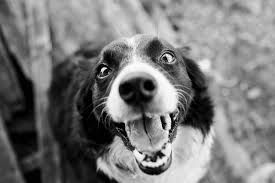

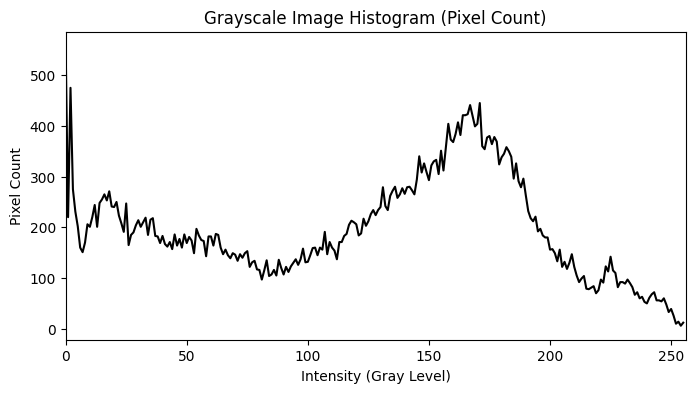

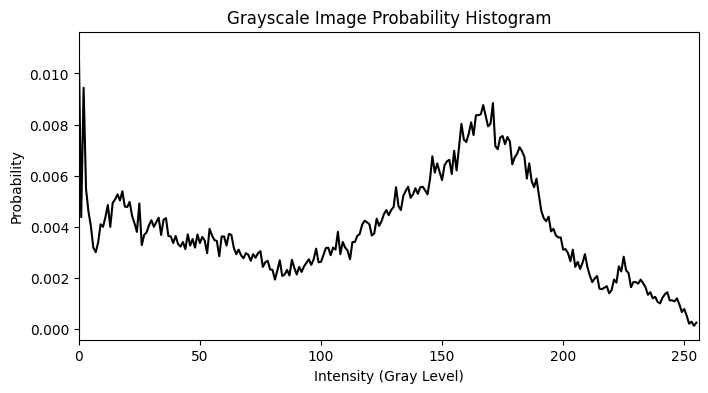

Brightened Grayscale Image:


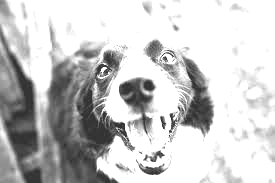

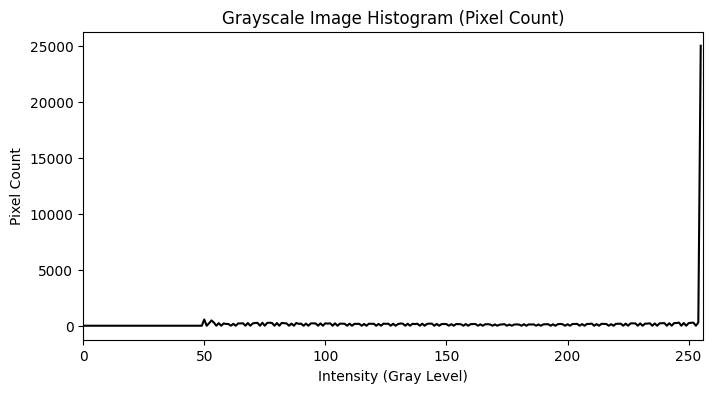

Darkened Grayscale Image:


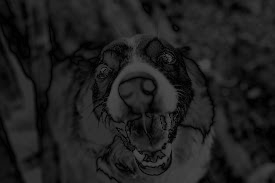

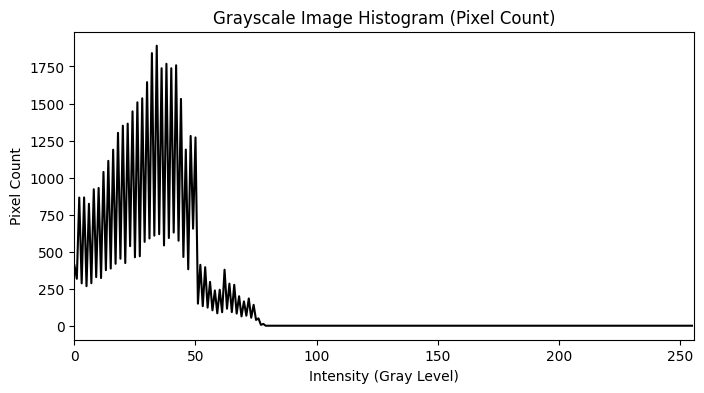

Histogram Equalized Grayscale Image:


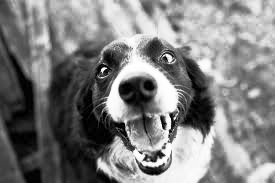

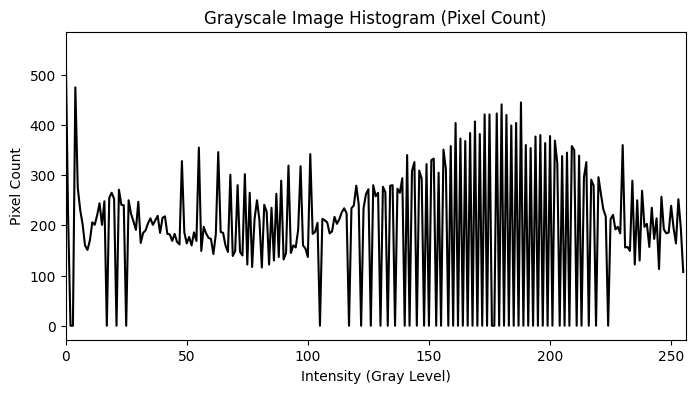

In [4]:
print("Original Grayscale Image:")
cv2_imshow(gray_img)

# (a) Compute & display histogram (Method 1: Pixel Count)
compute_histogram(gray_img, color=False)

# (b) Compute & display probability histogram (Method 2)
probability_histogram(gray_img)

# (c) Simulate Bright and Dark images by adjusting brightness
bright_img = cv2.convertScaleAbs(gray_img, alpha=1.5, beta=50)   # brighten
dark_img   = cv2.convertScaleAbs(gray_img, alpha=0.5, beta=-50)  # darken

print("Brightened Grayscale Image:")
cv2_imshow(bright_img)
compute_histogram(bright_img, color=False)

print("Darkened Grayscale Image:")
cv2_imshow(dark_img)
compute_histogram(dark_img, color=False)

equalized_gray = apply_histogram_equalization_gray(gray_img)
print("Histogram Equalized Grayscale Image:")
cv2_imshow(equalized_gray)
compute_histogram(equalized_gray, color=False)



Original Color Image:


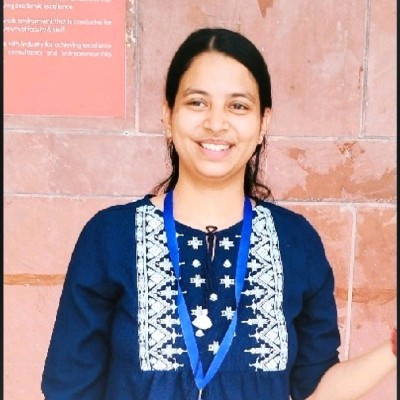

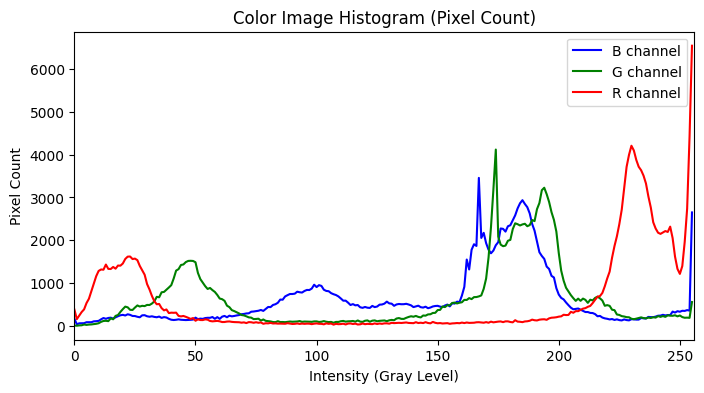

Color Image Converted to Grayscale:


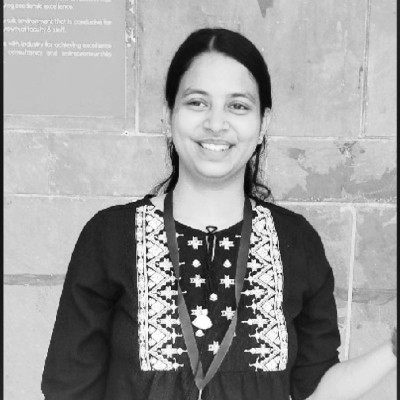

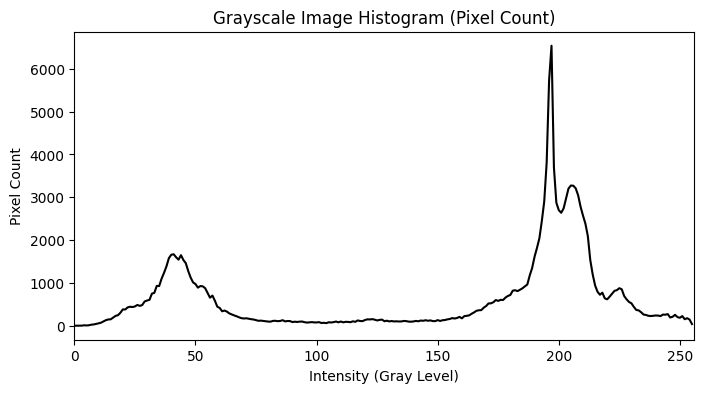

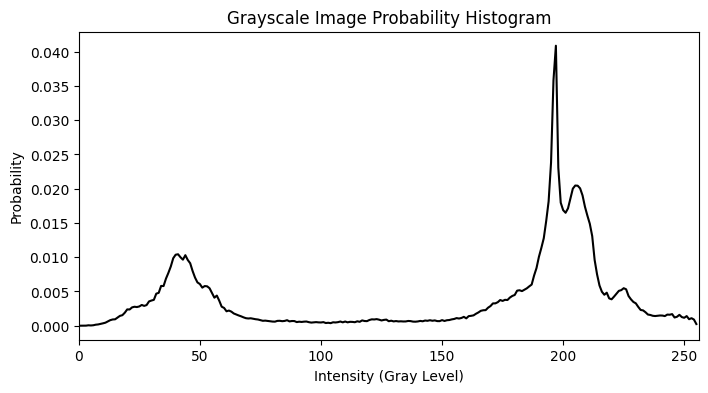

Histogram Equalized Color Image:


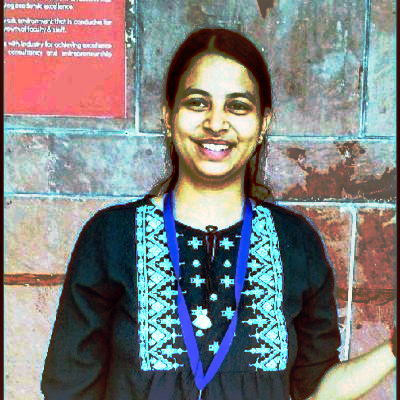

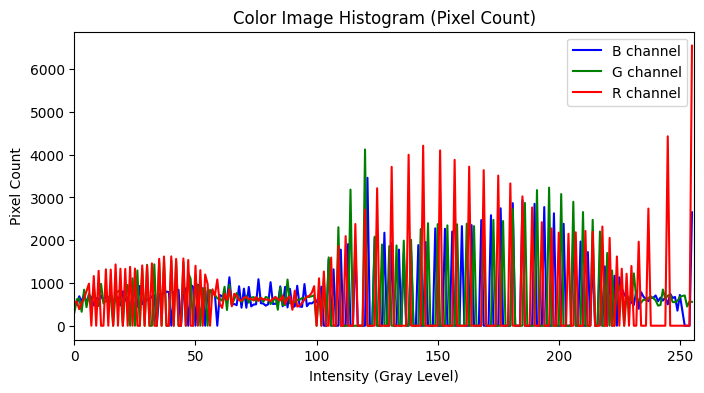

In [5]:
print("Original Color Image:")
cv2_imshow(color_img)

compute_histogram(color_img, color=True)

color_to_gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
print("Color Image Converted to Grayscale:")
cv2_imshow(color_to_gray)
compute_histogram(color_to_gray, color=False)
probability_histogram(color_to_gray)

equalized_color = apply_histogram_equalization_color(color_img)
print("Histogram Equalized Color Image:")
cv2_imshow(equalized_color)
compute_histogram(equalized_color, color=True)

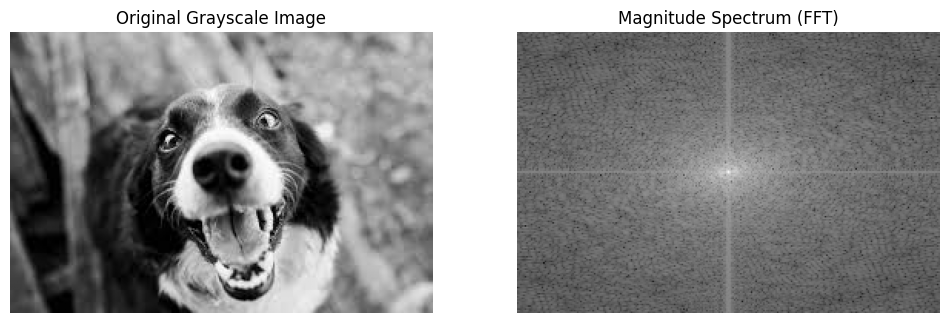

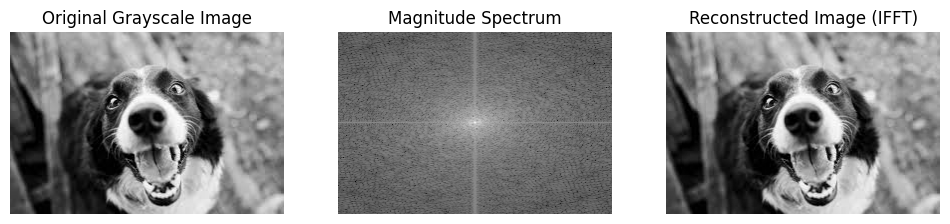

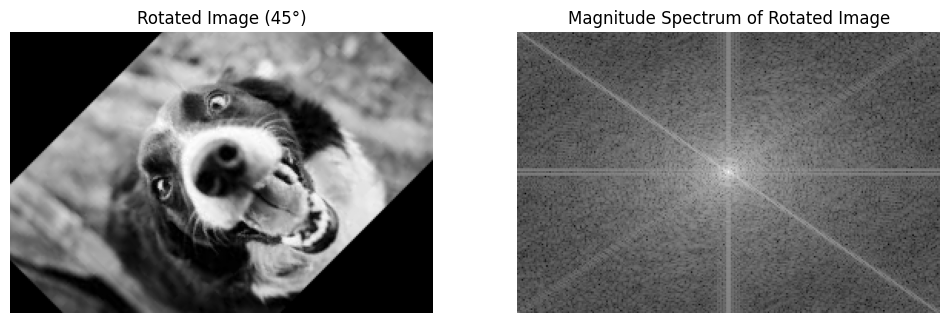

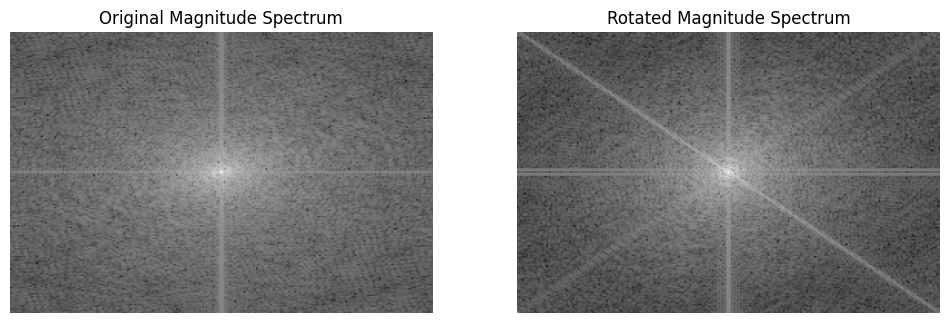

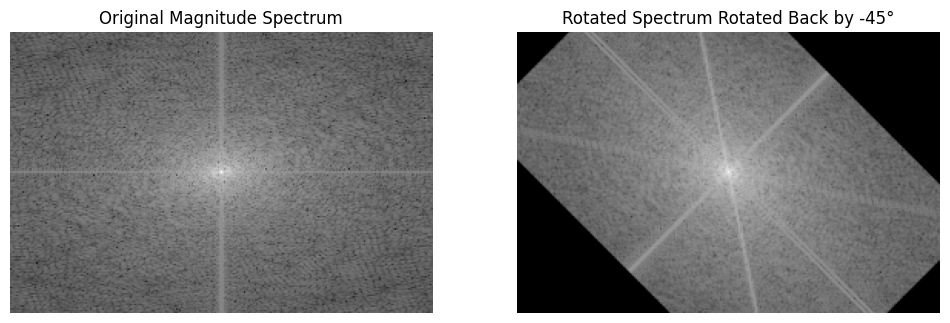

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_fft(image):
    """
    Compute the FFT of a grayscale image and return:
    - The shifted FFT (with zero frequency at the center)
    - The magnitude spectrum (log scaled)
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # add 1 to avoid log(0)
    return fshift, magnitude_spectrum

def compute_ifft(fshift):
    """
    Reconstruct the image from the shifted FFT using the Inverse FFT.
    Returns a real-valued image.
    """
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back_norm = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_back_norm)

def rotate_image(image, angle):
    """
    Rotate the given image by 'angle' degrees.
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated


fshift, magnitude_spectrum = compute_fft(gray_img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis("off")
plt.show()

reconstructed_img = compute_ifft(fshift)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image (IFFT)")
plt.axis("off")
plt.show()

angle = 45
rotated_img = rotate_image(gray_img, angle)

fshift_rot, magnitude_spectrum_rot = compute_fft(rotated_img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated Image (45°)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rot, cmap='gray')
plt.title("Magnitude Spectrum of Rotated Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rot, cmap='gray')
plt.title("Rotated Magnitude Spectrum")
plt.axis("off")
plt.show()
M_inv = cv2.getRotationMatrix2D((magnitude_spectrum_rot.shape[1]//2, magnitude_spectrum_rot.shape[0]//2), -angle, 1.0)
rotated_back_spectrum = cv2.warpAffine(magnitude_spectrum_rot, M_inv, (magnitude_spectrum_rot.shape[1], magnitude_spectrum_rot.shape[0]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_back_spectrum, cmap='gray')
plt.title("Rotated Spectrum Rotated Back by -45°")
plt.axis("off")
plt.show()
